# Anomaly Detection with Machine Learning
* Notebook by Adam Lang
* Date: 12/27/2024

# Overview
* In this notebook we will review anomaly detection techniques in Machine Learning.

# Anomaly Detection
* The goal is to find or detect **OUTLIERS** in a dataset.
* A simple example using DBSCAN:

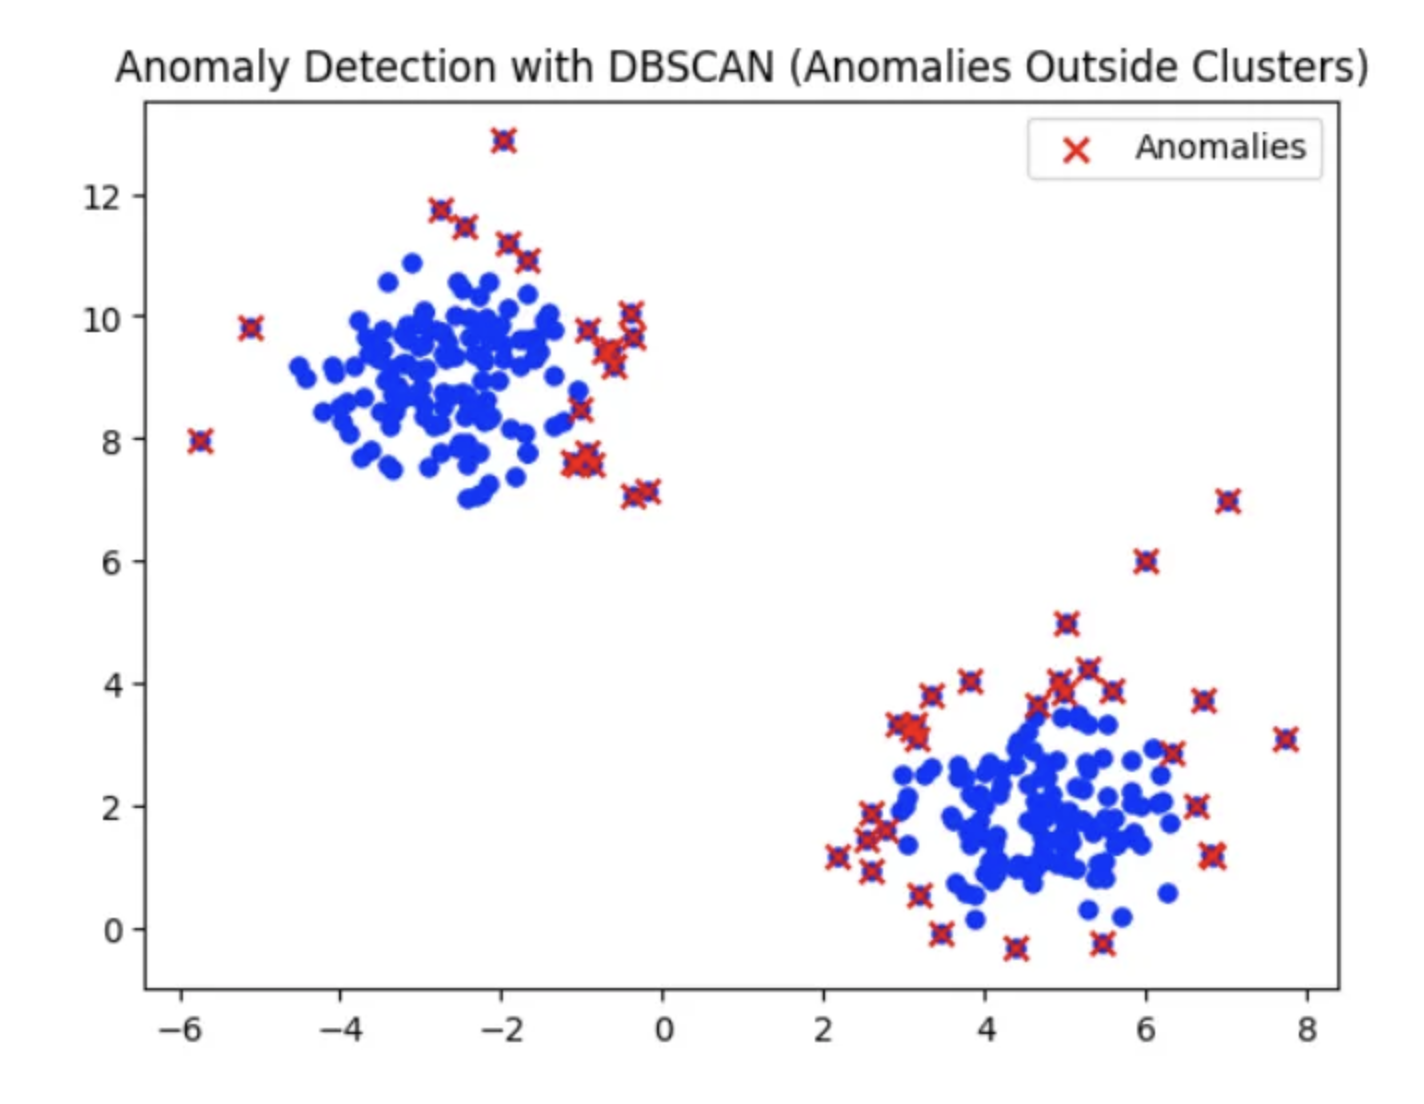

# Industry Use Cases for Anomaly Detection in Machine Learning
1.Event detection in sensor networks
2. Manufacturing quality control
3. Healthcare monitoring
4. Social media monitoring
5. Fraud detection
6. Network intrusion detection
7. Healthcare monitoring
8. Insurance claim analysis
9. Cybersecurity threat detection
10. Identity theft
11. Traffic monitoring
12. Network intrusion detection
13. Data breaches
14. Intrusion detection
15. Video surveillance

# Algorithmic Approaches to Anomaly Detection
* This is an excellent diagram with the various algorithmic approaches to anomaly detection (source: Medium, 2023):

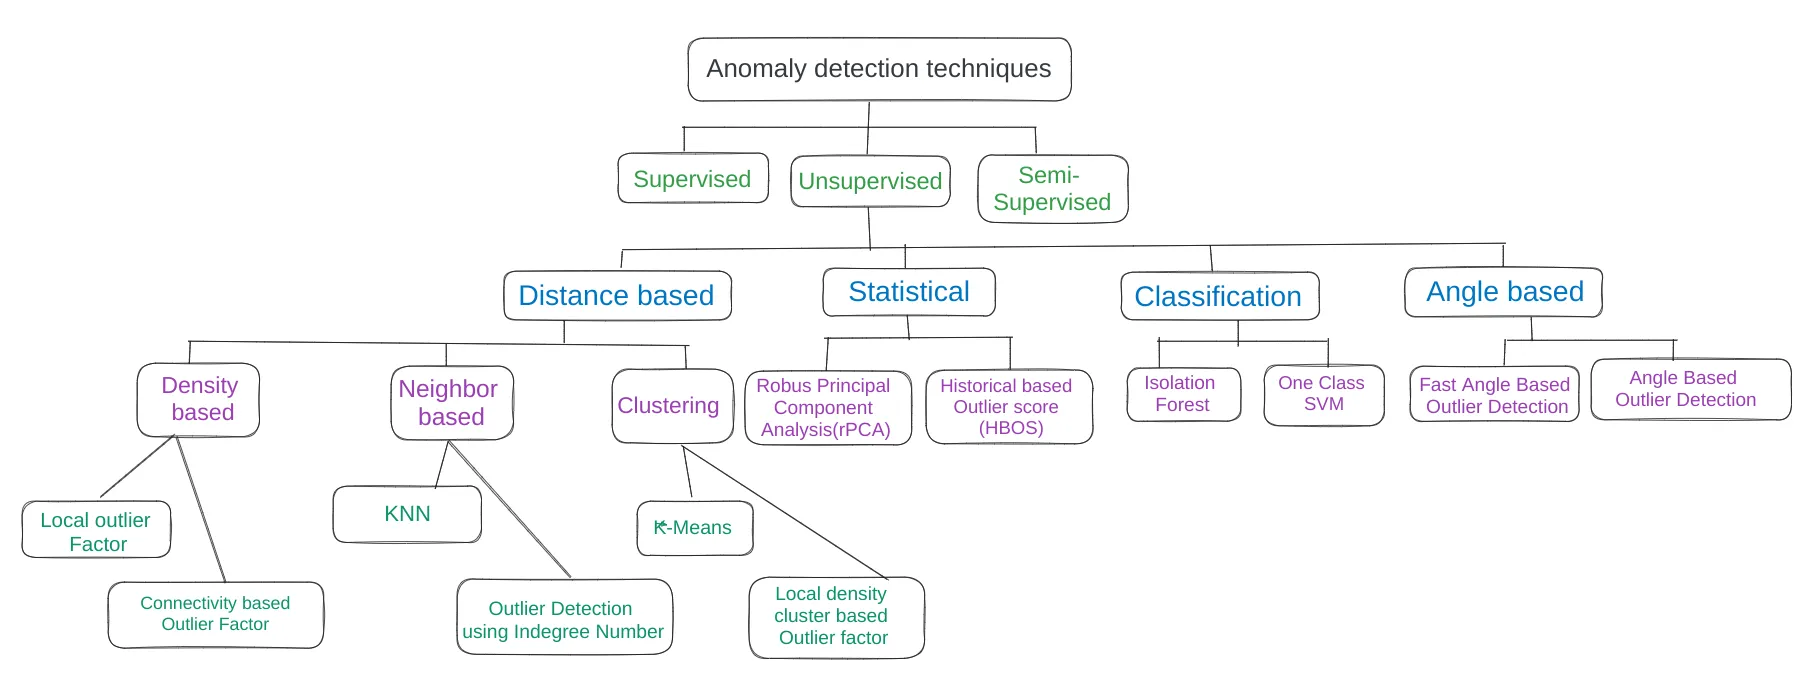

Breaking this down further:
1. *Statistical*
  * **Z-Score/Standard Score**
    * Measures how many standard deviations a data point is from the mean.
    * Points that are further from the mean are suspicious for anomalies.

  * **Percentiles**
    * This method is based on percentiles or quantiles.
    * Basic rule: values below or above a certain threshold are usually outliers or anomalies.


2. *Machine Learning*
  * **Isolation Forest**
    * Ensemble learning method that builds tree structures to isolate anomalies.
  * **One-Class SVM**
    * Support vector machine (SVM) model trained to classify data points as normal or outliers/anomalies.
  * **K-Nearest Neighbors (KNN)**   
    * Classifies an anomaly score based on distance to K-nearest neighbors.
    * Distant points are considered potential anomalies.
  * **Autoencoders**
    * Neural networks are designed to learn a compressed pattern representations of data.
    * This is where reconstruction error can be used to identify anomalies.


3. *Clustering*
  * **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**
    * Data points are clustered based on their **density**.
    * Data points that DO NOT belong to any cluster are considered outliers/anomalies.

  * **K-Means Clustering**
    * Data points that DO NOT belong to well-defined cluster are considered anomalies.
    * The issue with K-means clustering is finding the optimal value of "K" which is usually based on the **Elbow Method**.
    * The **Elbow Method** which analyzes the plot of the sum of squares (SSE) against the number of clusters, looks for the "knee" point where adding more clusters does not reduce the SSE significantly.
      * The **elbow** though can be subjective and change results based on the interpretation.
    * There are other methods that are altheratives and can act as a validation or proof of the optimal k value:
      1. **Silhoutte Score**
        * Evaluates the quality of a k-means clustering solution by measuring how well separated and cohesive the clusters are, with a higher score indicating better clustering.
        * Range is between -1 and 1.
          * Values closer to 1 indicate well defined clusters.
          * Values closer to -1 indicate poorly defined clusters.
      2. **Davies-Boulding Index (DBI)**
        * Measures the ratio of within-cluster distances to between-cluster distances, with a lower DBI indicating better separation
      3. **Calinski-Harabasz Index**
        * Similar to the DBI, but considers the variance within clusters relative to the variance between clusters, with a higher value indicating better clustering.
      4. **Gap Statistic**
        * Compares the observed within-cluster variance to the expected variance from a reference distribution of randomly sampled data points.


4. *Time-Series Analysis*
  * **Moving Averages**
    * Finds anomalies based on deviations from the moving average or exponential moving average.

  * **Seasonal Decomposition**
    * Decomposes a time series into components:
      * Trend
      * Seasonal
      * Residuals
    * Anomalies are often detected in the **residual component.**


5. *Proximity-based approaches*
  * **Mahalanobis Distance**
    * Measures distance of data points from the center of the data distribution.
    * Evaluates correlations between features.

  * **Local Outlier Factor (LOF)**
    * Computes local density deviation of a data point compared to its neighbors.
    * Finds regions with different densities which are often outliers or anomalies.



## Other References Related to Clustering
1. Yellowbrick is an excellent visualization library
  * link: https://www.scikit-yb.org/en/latest/api/cluster/index.html

2. Recent 2024 Paper - **A New Index for Clustering Evaluation Based on Density Estimation**
  * link: https://arxiv.org/html/2207.01294v4

3. Blog post: **Is Silhouette the Right Clustering Evaluation Metric for You?**
  * link: https://medium.com/@giannispoy/is-silhouette-the-right-clustering-evaluation-metric-for-you-dcfdbb268be4

4. Blog post: **Anomaly Detection with Unsupervised Machine Learning**
  * link: https://medium.com/simform-engineering/anomaly-detection-with-unsupervised-machine-learning-3bcf4c431aff

# 1. **Isolation Forest Algorithm**
* Unsupervised machine learning algorithm for anomaly detection.
* Ensemble method (similar to Random Forest).
  * This means it uses the average of the predictions by several decision trees when assigning the final anomaly score to a given data point.


## How it works
* It creates a decision tree leaf node for **every data point.**
* The most important aspect of this algorithm is that it VERY QUICKLY isolates anomolous data points RIGHT AWAY.
  * **It will create a "side branch" or leaf node that is partitioned from the rest of the nodes. This is the "isolated forest".**
  * This is not like other anomaly detection algorithms, which first define what is “normal” and then reports anything else as anomalous.

* For each data point we calculate the "isolation score".
  * If the score goes **beyond a threshold value, it is considered anomolous.**


## Calculation
* S = sample size of data points
* x = Data point
* `E(h(x))` = Average search depth for x or each data point from the isolated tree
* `c(m)` = Average depth of `h(x)`

* Equation:
  * `S(x,m) = 2 * -(E(h(x)))/(c(m))`

* Final Anomaly Score calculation
  * `E(h(x)) <<<< c(m) ==> S(x,m) = 1
    * If the anomaly score is near 1, then it is considered a true outlier.
    * We have to define the threshold score though, which could be 0.5 or any value based on our dataset.

* Normal Data Point calculation
  * `E(h(x)) >>> c(m) ==> S(x,m) = 0.5
    * If the calculation is at or below the threshold then it would be classified as **Normal**.

## Isolation Forest Implementation
* I will get a datset from the UC Irvine Machine Learning Repository via the `ucimlrepo` python package: https://pypi.org/project/ucimlrepo/

In [1]:
## install ucimlrepo
%%capture
!pip3 install -U ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo, list_available_datasets

# check which datasets can be imported
list_available_datasets()

-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Annealing                                                                               3     
Audiology (Standardized)                                                                8     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Balloons                       

In [4]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


We will use the Air Quality dataset: https://archive.ics.uci.edu/dataset/360/air+quality
* Contains the responses of a gas multisensor device deployed on the field in an Italian city. Hourly responses averages are recorded along with gas concentrations references from a certified analyzer.

In [12]:
# Fetch dataset from UCI repository
air_data = fetch_ucirepo(id=360)

In [13]:
## get data type
type(air_data)

ucimlrepo.dotdict.dotdict

In [62]:
# Convert to DataFrame
df = air_data.data.features

# Select features -- lets use 4 columns
df2 = df[['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']]

# Drop rows with missing values (-200)
df2 = df2.replace(-200, np.nan)
df2 = df2.dropna()

print(df2.shape)
df2.head()

(6941, 4)


,CO(GT),C6H6(GT),NOx(GT),NO2(GT)
0,2.6,11.9,166.0,113.0
1,2.0,9.4,103.0,92.0
2,2.2,9.0,131.0,114.0
3,2.2,9.2,172.0,122.0
4,1.6,6.5,131.0,116.0


In [63]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6941 entries, 0 to 9356
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CO(GT)    6941 non-null   float64
 1   C6H6(GT)  6941 non-null   float64
 2   NOx(GT)   6941 non-null   float64
 3   NO2(GT)   6941 non-null   float64
dtypes: float64(4)
memory usage: 271.1 KB


In [50]:
df2.describe()

,CO(GT),C6H6(GT)
count,7344.000000,7344.000000
mean,2.129711,10.275735
std,1.436472,7.441068
min,0.100000,0.200000
25%,1.100000,4.600000
50%,1.800000,8.500000
75%,2.800000,14.300000
max,11.900000,63.700000


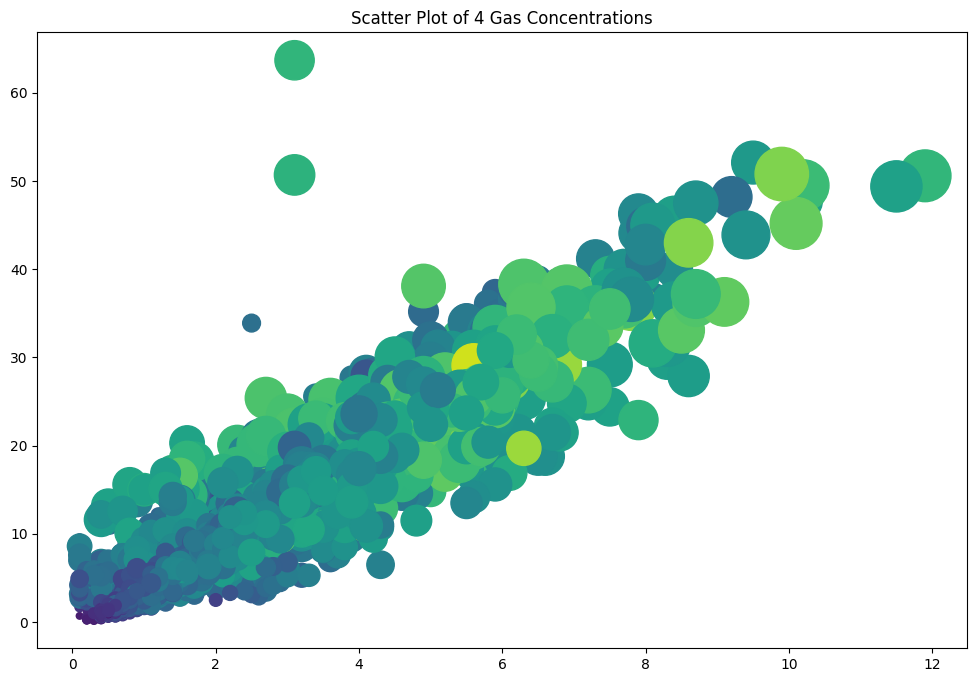

In [65]:
## plot data
fig = plt.figure(figsize=(12,8))
plt.scatter(df2.loc[:,'CO(GT)'],df2.loc[:,'C6H6(GT)'],
            df2.loc[:,'NOx(GT)'], df2.loc[:,'NO2(GT)'])

plt.title('Scatter Plot of 4 Gas Concentrations')
plt.show();

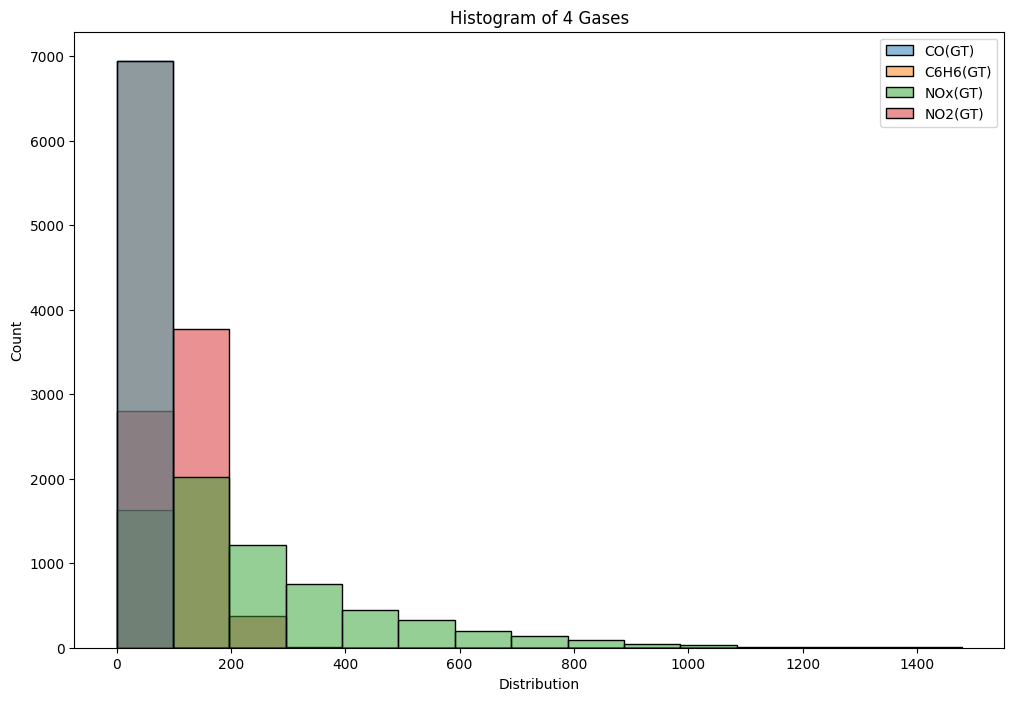

In [66]:
## histogram
fig = plt.figure(figsize=(12,8))
sns.histplot(df2,bins=15).set(title='Histogram of 4 Gases')
plt.xlabel('Distribution')
plt.show();

Below we see `contamination` parameter
* This is the amount of contamination of the data set
  * **The proportion of outliers in the data set.**
  * Used when fitting to define the threshold on the scores of the samples.

In [67]:
##. import isolation forest
from sklearn.ensemble import IsolationForest

## classifier
clf = IsolationForest(contamination=0.2)

## fit forest
clf.fit(df2)

## get predictions
predictions = clf.predict(df2)

In [68]:
## predictions
predictions[0:100]

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1])

Summary:
* We can see the first 100 points where there are 1s and -1s.
* Recall from above that a value closer to 1 is normal, a value as -1 is considered outlier/anomalies.

In [69]:
## get pred indices into array
ab_index = np.where(predictions < 0)
ab_index

(array([   9,   23,   24, ..., 6908, 6930, 6934]),)

In [70]:
# count number of values in abnormal_index array

print(len(ab_index[0]))

1388


In [71]:
(1388/(9356))*100

14.83539974348012

Summary
* Looks like there are 1,388 outliers in the dataset considering the entire dataset is 9,356 which is about 14.8%.

In [72]:
## get the values of the df2
x = df2.values

## Scatter Plot of outliers

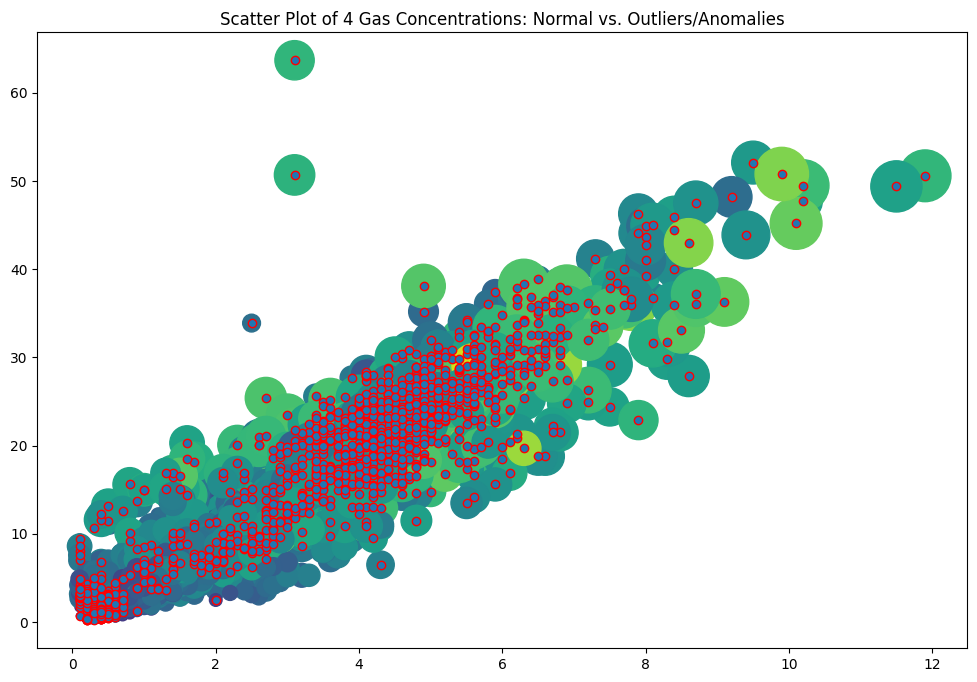

In [74]:
## plot data
fig = plt.figure(figsize=(12,8))

## abnormal index
ab_ind = np.where(predictions < 0)
## original scatter plot
plt.scatter(df2.loc[:,'CO(GT)'],df2.loc[:,'C6H6(GT)'],
            df2.loc[:,'NOx(GT)'], df2.loc[:,'NO2(GT)'])

## abnormal plot
plt.scatter(x[ab_index,0], x[ab_index,1],edgecolors="r")


plt.title('Scatter Plot of 4 Gas Concentrations: Normal vs. Outliers/Anomalies')
plt.show();

## Summary
* We were able to see the outliers right away using the Isolation Forest.
* Next lets look at DBSCAN dense clustering.

# **2. DBSCAN Clustering**

* The great thing about DBSCAN is that it can create clusters from NON-LINEAR data points.
* This is why DBSCAN is powerful for anomaly detection especially with non-linear data.

## 3 Main Points of DBSCAN
* **The goal is to identify DENSE REGIONs which can be measured by the number of objects close to a given point.**
* These 3 points below perform well with NON-LINEAR data.
1. Core point
2. Border point
3. Noise/outlier

## 2 hyperparameters we will use:
1. **Epsilon**
  * Max distance (euclidean distance) between a pair of points --- radius of circle.
  * The 2 points are considered as neighbors if and only if they are separated by a distance less than or equal to epsilon.

2. **MinPoints**
  * Minimum number of points required to form a dense cluster.
  *

## Algorithm of DBSCAN
1. **Core Point**
  * The number of points within the Epsilon (radius) of the circle should be GREATER than the number of MINIMUM points.
  * Another way to put this is if a point has at least min number of points including itself within its epsilon neighborhood.


2. **Border Points**
* These are classified or labeled if the number of data points within the radius is LESS THAN the mininum number of points.
* A selected point that is within a neighborhood of a core point but it itself cannot be a core point


3. **Outliers**
* DBSCAN robust to outliers!!!
* No other points in this circle.
* A selected point that is neither a core point nor a border point.
  * It means these points are true outliers that are not associated with any dense clusters


* Below is an example of the points (source: STHDA)

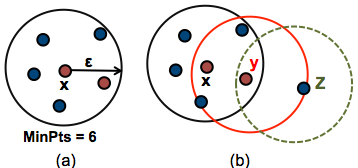

Source: https://www.sthda.com/english/wiki/wiki.php?id_contents=7940

* Another great example of the above algorithm:
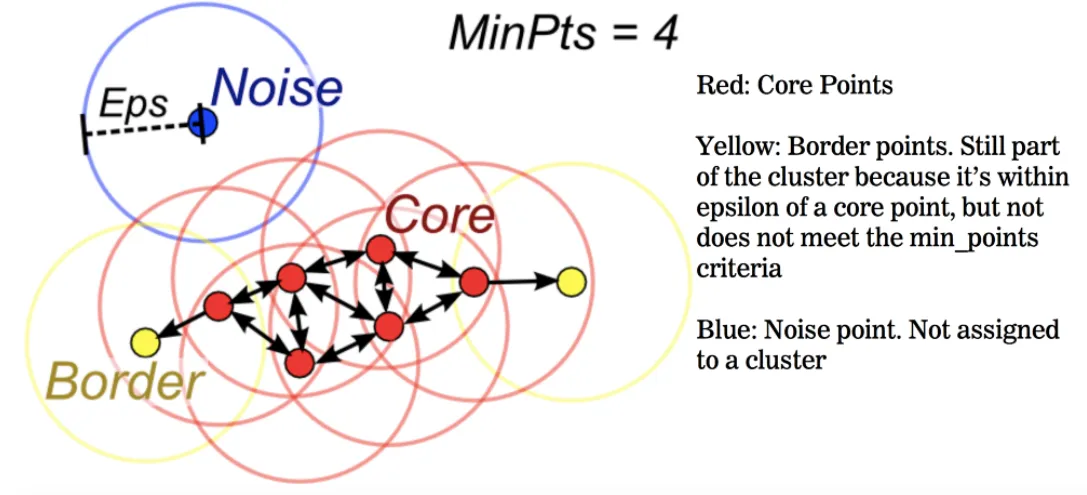

Source: https://medium.com/@agarwalvibhor84/lets-cluster-data-points-using-dbscan-278c5459bee5

## DBSCAN Implementation

In [75]:
## imports
from sklearn.cluster import DBSCAN
#from sklearn.datasets import make_moons ## sklearn dataset
from sklearn.datasets import make_circles

In [76]:
## create dataset x,y --> 750 samples with some noise
X, y = make_circles(n_samples=750,
                    factor=0.3,
                    noise=0.1)

In [77]:
## lets see X
X

array([[-0.07492103,  1.05635357],
       [ 0.17371728, -0.02586976],
       [ 0.27246415,  0.25882406],
       ...,
       [ 0.19918272,  0.34707184],
       [ 0.10108633, -0.26123879],
       [-0.09796878, -0.09223539]])

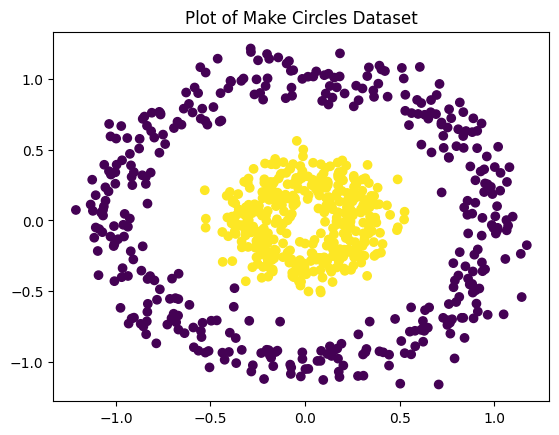

In [80]:
## plot the circles
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Plot of Make Circles Dataset")
plt.show();

In [81]:
## create dbscan cluster
dbscan = DBSCAN(eps=0.10)

# fit model
dbscan.fit(X)

DBSCAN(eps=0.1)

In [82]:
## predict on X
dbscan.fit_predict(X)

array([ 0,  1,  1,  1,  1,  2,  3,  1,  4,  1,  5,  4,  5,  1,  1,  1,  0,
        5,  1,  1,  1,  0,  5,  1,  1,  6, -1,  4,  1, -1,  7,  1,  1,  1,
       -1,  1,  7,  1,  5,  1,  1,  5,  8, -1,  9,  1,  9,  1,  3,  6,  1,
        1,  5,  7,  9, -1,  8,  1, 11,  6,  8,  7,  1,  1, 10,  1,  1,  5,
        5,  5,  8,  1,  1,  1,  1,  1,  5,  1,  1, 10,  1,  1,  1, 11, -1,
        9,  1,  1,  1,  5,  1,  1,  3,  1,  1,  1,  0, -1,  1,  1,  2,  5,
        1,  4,  1,  1, -1,  3,  1,  5,  1,  2,  5,  1, -1,  8,  1,  3,  1,
        1,  5,  0,  1,  1, -1,  1,  1,  4,  1,  1,  1,  9,  1,  1,  7,  2,
        7,  4,  1,  1,  5,  1,  5,  7,  8,  1,  9,  1,  1,  5,  1,  1,  1,
        7,  1,  5, 10,  1,  1,  1,  0, -1,  4,  9,  0,  1, 11,  1, -1,  1,
        9,  1,  6,  1,  1,  1,  1,  1,  1,  1,  7,  9,  1,  1,  1,  0,  1,
        1,  0,  1,  1,  4,  1,  1,  1,  1, -1,  1,  9,  1,  1,  1,  1,  1,
        1,  9,  1,  2,  9,  8,  5,  0,  4,  9, -1,  1,  1,  5,  1,  6,  1,
        5,  7,  2,  7,  1

Summary
* Anytime we see a -1 above, it is an outlier that DBSCAN has identified.

In [83]:
## get labels
dbscan.labels_

array([ 0,  1,  1,  1,  1,  2,  3,  1,  4,  1,  5,  4,  5,  1,  1,  1,  0,
        5,  1,  1,  1,  0,  5,  1,  1,  6, -1,  4,  1, -1,  7,  1,  1,  1,
       -1,  1,  7,  1,  5,  1,  1,  5,  8, -1,  9,  1,  9,  1,  3,  6,  1,
        1,  5,  7,  9, -1,  8,  1, 11,  6,  8,  7,  1,  1, 10,  1,  1,  5,
        5,  5,  8,  1,  1,  1,  1,  1,  5,  1,  1, 10,  1,  1,  1, 11, -1,
        9,  1,  1,  1,  5,  1,  1,  3,  1,  1,  1,  0, -1,  1,  1,  2,  5,
        1,  4,  1,  1, -1,  3,  1,  5,  1,  2,  5,  1, -1,  8,  1,  3,  1,
        1,  5,  0,  1,  1, -1,  1,  1,  4,  1,  1,  1,  9,  1,  1,  7,  2,
        7,  4,  1,  1,  5,  1,  5,  7,  8,  1,  9,  1,  1,  5,  1,  1,  1,
        7,  1,  5, 10,  1,  1,  1,  0, -1,  4,  9,  0,  1, 11,  1, -1,  1,
        9,  1,  6,  1,  1,  1,  1,  1,  1,  1,  7,  9,  1,  1,  1,  0,  1,
        1,  0,  1,  1,  4,  1,  1,  1,  1, -1,  1,  9,  1,  1,  1,  1,  1,
        1,  9,  1,  2,  9,  8,  5,  0,  4,  9, -1,  1,  1,  5,  1,  6,  1,
        5,  7,  2,  7,  1

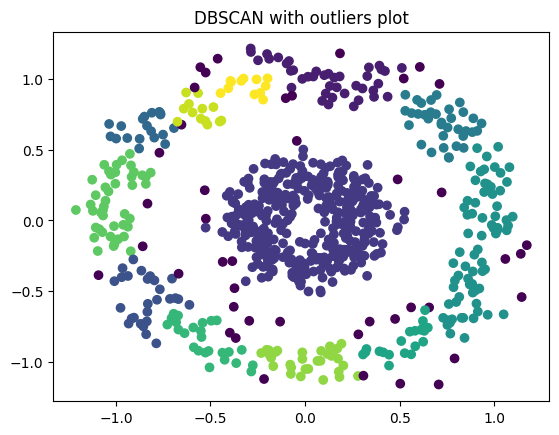

In [89]:
## plot with labels
plt.scatter(X[:,0], X[:,1], c=dbscan.labels_)
plt.title('DBSCAN with outliers plot')
plt.show();

Summary
* We can see that DBSCAN creates dense clusters and isolates the outliers.

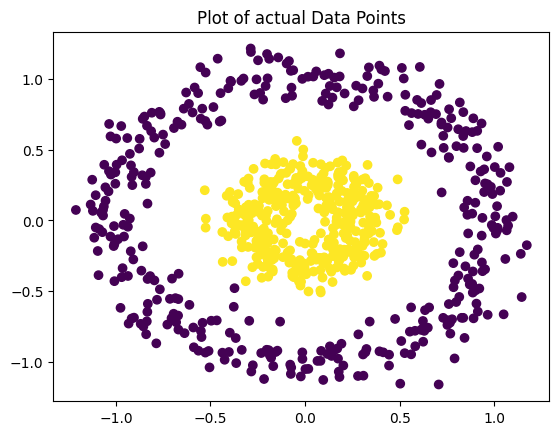

In [88]:
## plot
plt.scatter(X[:,0], X[:,1],c=y)
plt.title('Plot of actual Data Points')
plt.show();

# 3. Local Outlier Factor Anomaly Detection


* This is also known as LOF or LOF Score.
* It also uses the KNN or K-nearest neighbor algorithm.
* Unsupervised anomaly detection algorithm which computes the local density deviation of a given data point with respect to its neighbors.
  * LOF considers as outliers the samples that have a **substantially lower density than their neighbors.**

* The LOF of a point is based on the **ratios of the local density of the area around the point and the local densities of its neighbors.**
  * It considers *relative density* of data points.

* In plain english, this means that LOF compares the **local density of a point to local density of its k-nearest neighbors and gives a score as final output.**



* The algorithm excels at detecting the difference between the 2 types of outliers below:

1. **Local Outliers**

2. **Global Outliers**

## How LOF Works
* KNN goal is to calculate the local density.
* Lets say that `K=5`.
  * The algo will try to find the 5 nearest neighbors.
  * Then we will look at the density with respect to the nearest 5 neighbors.
  * If the distance is MORE the density is LESS --> this is a **Local Outlier**.

* Implementation from sklearn: https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html

In [94]:
import numpy as np

np.random.seed(42)

X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

In [96]:
## fit model
from sklearn.neighbors import LocalOutlierFactor


## create classifier
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

## fit_predict
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

In [110]:
%%capture
!pip install plotly==5.15.0
import plotly.express as px


In [115]:
#Create DataFrame for Plotly Express
df = pd.DataFrame(X, columns=['x', 'y'])
df['outlier_score'] = X_scores
df['radius'] = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
df['ground_truth'] = ground_truth # add ground truth to the hover data


# Create the scatter plot
fig = px.scatter(df, x='x', y='y', color="outlier_score",
                 size='radius',
                 hover_data=['outlier_score', 'ground_truth'],  # Show ground truth on hover
                 title="Local Outlier Factor (LOF)")

# Update marker size
fig.update_traces(marker=dict(size=df['radius'] * 30))

# Update layout
fig.update_layout(
    xaxis_range=[-5, 5],
    yaxis_range=[-5, 5],
    xaxis_title="prediction errors: %d" % (n_errors),
    width=1000,
    height=600,
)

fig.show()

In [109]:
## gete outlier scores
outlier_scores = clf.negative_outlier_factor_
outlier_df = pd.DataFrame(outlier_scores)
outlier_df.value_counts()

,count
0,
-8.117908,1
-0.996888,1
-1.012455,1
-1.010839,1
-1.009761,1
...,...
-1.133882,1
-1.132837,1
-1.132621,1
